# Make Pandas Memory Efficient 

In [1]:
import pandas as pd
import numpy as np

In [10]:
import timeit
%load_ext timeit

The timeit module is not an IPython extension.


In [12]:
def get_dataset(size):
    df = pd.DataFrame()
    df['position'] = np.random.choice(['left','middle','right'],size)
    df['age'] = np.random.randint(1,50,size)
    df['team'] = np.random.choice(['red','blue','yellow','green'],size)
    df['win'] = np.random.choice(['yes','no'],size)
    df['prob'] = np.random.uniform(0,1,size)
    return df

In [13]:
df = get_dataset(1000000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   position  1000000 non-null  object 
 1   age       1000000 non-null  int32  
 2   team      1000000 non-null  object 
 3   win       1000000 non-null  object 
 4   prob      1000000 non-null  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 34.3+ MB


In [14]:
df.shape

(1000000, 5)

In [21]:
%timeit df['age_rank'] = df.groupby(['team','position'])['age'].rank()

988 ms ± 155 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%timeit df['prob_rank'] = df.groupby(['team','position'])['prob'].rank()

832 ms ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%timeit df['win_prob_rank'] = df.groupby(['team','position','win'])['prob'].rank()

1 s ± 75.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Making Memory efficient

## Changing Data types

In [35]:
df = get_dataset(1000000)
df['position'] = df['position'].astype('category')
df['team'] = df['team'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype   
---  ------    --------------    -----   
 0   position  1000000 non-null  category
 1   age       1000000 non-null  int32   
 2   team      1000000 non-null  category
 3   win       1000000 non-null  object  
 4   prob      1000000 non-null  float64 
dtypes: category(2), float64(1), int32(1), object(1)
memory usage: 21.0+ MB


## Int Downcasting Value Range
- int8 can store integers from - 128 to 127
- int16 can store integers from -32768 to 32768
- int64 can store integers from -9223372036854775808 to 9223372036854775808

In [36]:
df['age'].head(2)

0    24
1    18
Name: age, dtype: int32

In [39]:
print('max value of age =',df['age'].max(),' & ','min value of age =',df['age'].min())

max value of age = 49  &  min value of age = 1


In [40]:
df['age'] = df['age'].astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype   
---  ------    --------------    -----   
 0   position  1000000 non-null  category
 1   age       1000000 non-null  int8    
 2   team      1000000 non-null  category
 3   win       1000000 non-null  object  
 4   prob      1000000 non-null  float64 
dtypes: category(2), float64(1), int8(1), object(1)
memory usage: 18.1+ MB


In [41]:
df['prob'].head(2)

0    0.753883
1    0.295704
Name: prob, dtype: float64

## Casting floats
- Be careful while using it on float
- Since it has decimal point the values may change

In [48]:
df['prob'] = df['prob'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype   
---  ------    --------------    -----   
 0   position  1000000 non-null  category
 1   age       1000000 non-null  int8    
 2   team      1000000 non-null  category
 3   win       1000000 non-null  object  
 4   prob      1000000 non-null  float32 
dtypes: category(2), float32(1), int8(1), object(1)
memory usage: 14.3+ MB


## Casting bools
- true or false, yes or no

In [52]:
df['win'] = df['win'].map({'yes':True,'no':False})
df['win'] = df['win'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype   
---  ------    --------------    -----   
 0   position  1000000 non-null  category
 1   age       1000000 non-null  int8    
 2   team      1000000 non-null  category
 3   win       1000000 non-null  bool    
 4   prob      1000000 non-null  float32 
dtypes: bool(1), category(2), float32(1), int8(1)
memory usage: 7.6 MB


In [53]:
%timeit df['age_rank'] = df.groupby(['team','position'])['age'].rank()

505 ms ± 15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
%timeit df['prob_rank'] = df.groupby(['team','position'])['prob'].rank()

782 ms ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
%timeit df['win_prob_rank'] = df.groupby(['team','position','win'])['prob'].rank()

715 ms ± 20.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# What did we do?
- We changed the data types of the columns.
- We Downcasted the datatypes values.

#### Before making alterations

In [67]:
resultsg1 = pd.DataFrame(
    [
    ["groupby1",998,155],
    ["groupby2",832,19.3],
    ["groupby3",1000,75.1]
    ],
    columns=["operation","mean","std"],
)
resultsg1

,operation,mean,std
0,groupby1,998,155.0
1,groupby2,832,19.3
2,groupby3,1000,75.1


<AxesSubplot:title={'center':'Time to run the operations'}, xlabel='operation'>

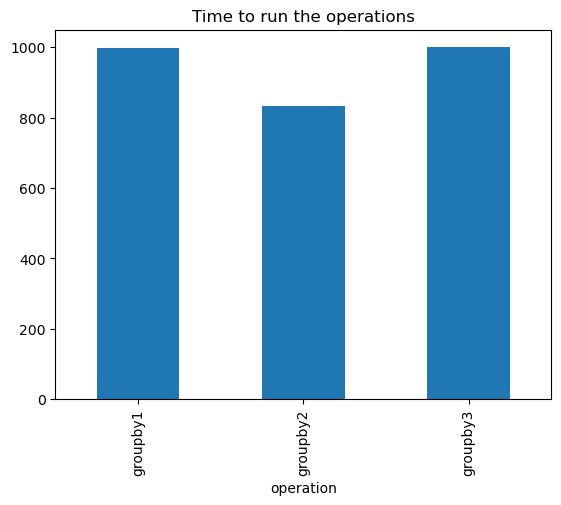

In [68]:
resultsg1.set_index('operation')['mean'].plot(kind='bar',title='Time to run the operations')

#### After making alterations

In [69]:
resultsg2 = pd.DataFrame(
    [
    ["groupby1",505,15],
    ["groupby2",782,110],
    ["groupby3",715,20.9]
    ],
    columns=["operation","mean","std"],
)
resultsg2

,operation,mean,std
0,groupby1,505,15.0
1,groupby2,782,110.0
2,groupby3,715,20.9


<AxesSubplot:title={'center':'Time to run the operations'}, xlabel='operation'>

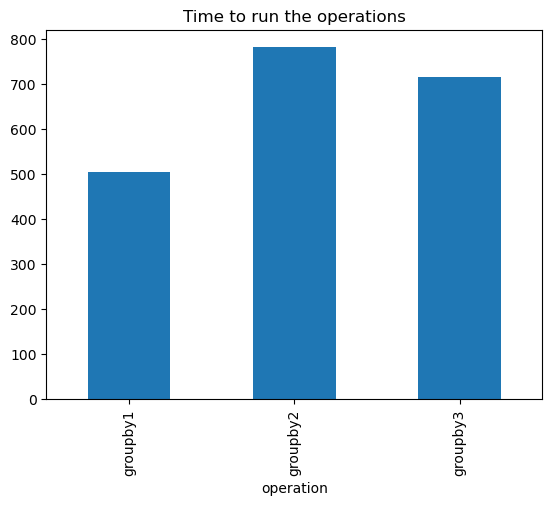

In [70]:
resultsg2.set_index('operation')['mean'].plot(kind='bar',title='Time to run the operations')

# Memory Efficiency

<AxesSubplot:title={'center':'Memory Usage Before & After'}, xlabel='Memory'>

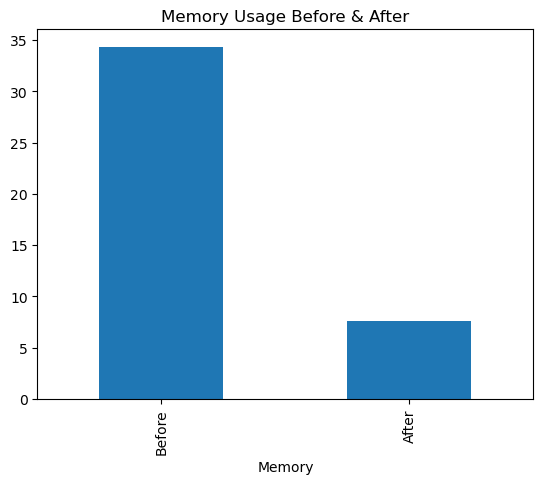

In [72]:
results = pd.DataFrame(
    [
    ["Before",34.3],
    ["After",7.6],
    ],
    columns=["Memory","Efficiency"],
)
results
results.set_index('Memory')['Efficiency'].plot(kind='bar',title='Memory Usage Before & After')